### 2장 보충

##### 컨볼루션(convolution 연산):

입력 영상을 스캔하면서, 현재위치의 픽셀에 커널(마스크,필터, 윈도우)의 중심이 오도록 한 후,

커널의 범위내에 포함되는 이웃 픽셀을, 커널의 원소와 곱하여 현재 위치값 결정.

<U>커널의 값에따라 이미지를 흐리게(blurring), smoothing , 선명하게(sharpening) 만들 수 도 있다.</U>

커널은 보통 3,5,7,9.. 와 같이 홀수 크기를 갖는다.(?)

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/convolution1.PNG" width="450" height="450">


위 와 같이 이미지와 커널을 컨볼루션 해야할 때. (1,1) 점에서 컨볼루션 하면. 커널의 중심을 (1,1)로 옮기고 각점마다 내적후 (1,1)에 합해준다.

후에, 다른점들도 똑같이 다 컨볼루션 해주면 된다.
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/convolution2.PNG" width="350" height="350">

```python
img_output(1,1) = img_input(0,0)*mask(0,0) +  img_input(0,1)*mask(0,1)
                  img_input(0,2)*mask(0,2) +  img_input(1,0)*mask(1,0)
                  img_input(1,1)*mask(1,1) +  img_input(1,2)*mask(1,2)
                  img_input(2,0)*mask(2,0) +  img_input(2,1)*mask(2,1)
                  img_input(2,2)*mask(2,2)
```
----

파이썬에서는 컨볼루션 연산을 함수로 지원해준다!

cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None)

    src : 입력영상
    ddepth : 출력영상 데이터 타입.(ex) cv2.CV_8U,cv2.CV_32F,cv2.CV_64F,-1
    -1을 지정하면 src와 같은 타입의 영상
    
    kernel : 커널(필터,마스크) 행렬, 실수형.
    
    anchor: 고정점 위치. (-1,-1)이면 필터 중앙을 고정점으로
    
    borderType : 가장자리 픽셀 확장방식


---
### smoothing 연산( Gaussian, median filter )

화소와 이웃화소의 차이를 줄여 평탄한 영상으로 만들어주는 연산.

##### - median filter (중앙값)
median 필터는 현재 화소에 커널을 씌우고, 그 화소들의 중앙값을 현재 화소에 결과로 취한다.

가우시안 필터에 비해 에지가 잘 보존된다.메디안 필터를 에지 보존(edge preserving) 스무딩 필터라고 부르기도 한다.

```
cv2.medianBlur(src, ksize, dst=None)

• src : 입력 영상. 각 채널 별로 처리됨 (컬러 이미지도 상관없다.)

• ksize : 커널 크기. 1보다 큰 홀수를 지정. 숫자 하나를 집어주면 됌

• dst : 출력 영상, src와 같은 크기, 같은 타입

```

##### - gaussian filter
컨볼루션 연산을 수행하면, 멀리있는 이웃들의 값도 현재값에 영향을 준다.

거리에따라 영향을 달리하기 위해, 2차원 가우시안 분포의 확률밀도값을 담은 필터를 사용한다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/2dGaussian.PNG" width="350" height="350">


 필터 마스크 크기 = (8σ+ 1) 또는 (6σ+ 1) 홀수

```
cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None) 

• src: 입력 영상. 각 채널 별로 처리됨.

• dst: 출력 영상. src와 같은 크기, 같은 타입.

• ksize: 가우시안 커널 크기. (0, 0)을 지정하면 sigma 값에 의해 자동 결정됨

• sigmaX: x방향 sigma.

• sigmaY: y방향 sigma. 0이면 sigmaX와 같게 설정.

• borderType: 가장자리 픽셀 확장 방식.
```

----
##### salt & pepper 잡음인경우 smoothing

데이터 전송중 발생하는 현상으로, 요즘에는 발생안한다.

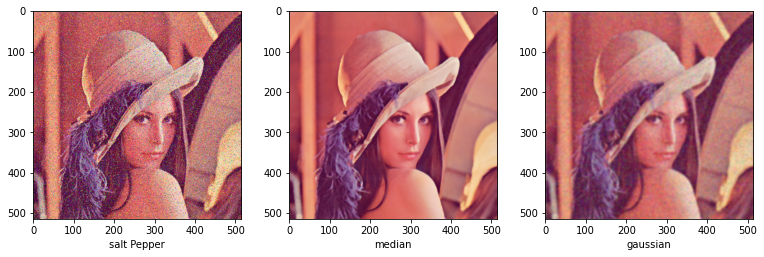

In [14]:
#salt &pepper 잡음인 경우 smoothing(median, gaussian)

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./data/saltpepper.png')#컬러 사진으로, 잡음 사진 읽기

median_img = cv2.medianBlur(img,5)# 커널크기 5
gaussian_img = cv2.GaussianBlur(img, (0, 0), 2)# (0,0)은 커널크기 자동설정, sigma_x,sigma_y = 1

img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)# rgb 순서로 바꾸기
median_img=cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB)
gaussian_img=cv2.cvtColor(gaussian_img, cv2.COLOR_BGR2RGB)


fig =plt.figure(figsize=(13,13))

plt.subplot(331)
plt.imshow(img)
plt.xlabel('salt Pepper')

plt.subplot(332)
plt.imshow(median_img)
plt.xlabel('median')

plt.subplot(333)
plt.imshow(gaussian_img)
plt.xlabel('gaussian')
plt.show()

# median 일때 가장 잘 없애고, gaussian은 edge가 옅어진다.

----
## 3장요약 - 에지 검출


## 3-1. 에지검출 기초

- 에지 : 영상의 명암, 컬러, 텍스처와 같은 특성이 급격히 변하는 지점. or 변화를 측정하고 가장 변화량이 큰곳.


### - 디지털 영상의 미분

- 1차원 영상에서 미분과 에지 검출
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/derivate1.PNG" width="350" height="400">
이산공간에서 미분은 Δx 가 1일때 이다. 이는, 커널 (-1,1)을 컨볼루션 하는것과 같다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/derivate2.PNG" width="350" height="400">
연산자를 바탕으로, 디지털 영상에서 엣지 화소를 찾아보자.

1. 영상 f를 미분한다.

2. 변화가 크면, f의 도함수도 크다. 임계값(threshold)을 4로 설정해 이진화한다.

3. 이진화 결과, 1을 갖는점을 에지 화소라 한다.

이렇게, edge를 찾는데 사용되는 연산자(커널)을 에지 연산자(edge operator)라 한다.

---
- 이계 도함수
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/2Dderivate.PNG" width="350" height="400">

이계도함수는 엣지가 여러 화소에서 걸쳐생기는 램프 에지를 찾기 위해서 사용된다.

---

- edge 모델과 연산자

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgeModel.PNG" width="450" height="600">

지금 edge 모델은  계단 애지(step edge), 램프 에지(ramp edge) 두가지 에지를 가진 영상이다. 그리고 이상적으로 잡음이 없다.

1. 영상 f에서 1계 도함수를 구한다.

2. 1계 도함수 결과, 계단 애지를 찾을 수 있다. 하지만, 램프 에지는 변화가 봉우리 형태로 걸쳐서 나타나 검출이 안된다.

3. 2계 도함수 결과, 부호가 교차되는 지점 영교차(zero crossing)이 검출된다. 그 지점에서 localization으로 에지의 정확한 위치를 찾아야한다.

---
- 현실적인 edge 모델

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/derivate3.PNG" width="450" height="600">

현실에서는 잡음이 발생하여, 스무딩 연산을 적용해야한다.

그런데, 스무딩은 크기가 3x3 이상의 연산자를 사용하므로 1x2 크기의 연산자는 너무작다 (?)

그래서 Δx=2로 두어, 1x3 연산자로 만든다.


---


### - 2차원 영상 확장

위의 Δx=2의 도함수를 확장하여 그래디언트를 계산하면, 2차원으로 확장할 수 있다.

- 그래디언트 백터(gradient vector)와 연산자

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/2Dmask.PNG" width="450" height="600">

y방향의 3x1 에지마스크와 x방향의 1x3 에지 마스크를 구할 수 있다.

하지만, 현실적으로는 3x1 크기로는 잡음에 대처할 수 없다.(주변의 두 픽셀만 반영이 되기 때문에 )

---
- 정방형 연산자

그래서 정방형으로 확장하여, 연산자 자체가 스무딩 효과를 지니도록 설계

##### 프레윗 연산자 (Prewitt operator)
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/prewitt.PNG" width="300" height="400">


x방향의 미분인 M.x를 보면, 해당 행뿐만 아니라 그 아래와 윗 행가지 고려한다. 즉, 스무딩효과를 내포한다.

M.y를 통해 수직엣지를 구할 수 있고, M.x를 통해 수평 엣지들을 구할 수 있다.

##### 소벨 연산자 (Sobel operator)
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/sobel.PNG" width="300" height="400">

소벨 연산자는 가까운 화소에 더 큰 가중치를 준다.

---
### - 애지 강도(edge magnitude)와 애지 방향(edge direction)
<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgeoperator.PNG" width="450" height="600">

1. 그래디언트는 dy,dx로 나타낸다.
2. 에지강도는 화소 (y,x)가 에지일 가능성 또는 신뢰도를 나타낸다.
3. 그래디언트 방향에 +90도 or -90도를 해준다면 에지 방향(edge direction)을 구할 수 있다.

엣지방향과 그래디언트 방향은 서로 수직이다.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/data/edgeandgradient.PNG" width="450" height="600">
엣지방향과 그래디언트 방향과, 에지방향을 8방향 양자화한 그림.

에지방향의 각도를 구하면, 45도씩 양자화 시킬 수 있다.

(엣지방향과 그래디언트 방향은 왜 구하지??)


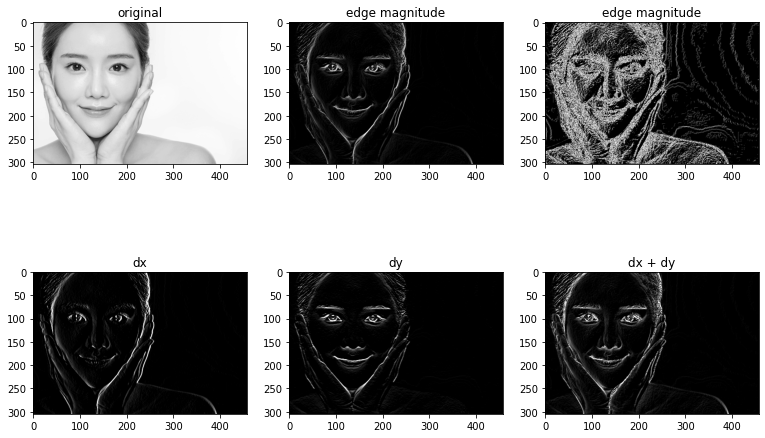

In [46]:
# EX) 소벨 마스크를 이용한 에지 검출. 에지와 관련된 맵들.
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./data/find_face.jpg",0) # gray scale로 읽어서, 1 채널 명암값에 필터를 적용한다.

# 소벨 커널을 직접 생성해서 엣지 검출
## 소벨 커널 생성
gx_k = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
gy_k = np.array([[-1,-2,-1],[0,0,0], [1,2,1]])


## 소벨 필터 적용
edge_dx = cv2.filter2D(img, -1, gx_k)
edge_dy = cv2.filter2D(img, -1, gy_k)

fig =plt.figure(figsize=(13,13))

plt.subplot(331)# 3행 3열중 1번째
plt.imshow(img,'gray')# 원본
plt.title('original')


#에지 강도 계산??
plt.subplot(332)
#plt.imshow(np.sqrt(np.square(edge_dx)+np.square(edge_dy)).astype(np.float32) ,'gray')
plt.imshow(cv2.magnitude(edge_dx.astype(np.float32),edge_dy.astype(np.float32)) ,'gray')# edge magnitude 계산.
plt.title('edge magnitude')

plt.subplot(333)
plt.imshow(np.sqrt(np.square(edge_dx)+np.square(edge_dy)).astype(np.float32) ,'gray')
plt.title('edge magnitude')


plt.subplot(334)# 3행 3열중 2번째
plt.imshow(edge_dx,'gray')# 수평 방향의 엣지
plt.title('dx')

plt.subplot(335)
plt.imshow(edge_dy,'gray')# 수직 방향의 엣지
plt.title('dy')

plt.subplot(336)
plt.imshow(edge_dx+edge_dy,'gray')# 수직 방향의 엣지
plt.title('dx + dy')


plt.show()

#소벨 필터의 결과 dx와 dy를 구할 수 있다.
#이를 통해, 그래디언트와 에지방향등을 구할 수 있다.

#머리카락을 보면, dx는 수평방향의 엣지를, dy는 수직방향의 엣지들을 찾는다.
#edge magnitude 계산시, 바깥 경계가 가장 진하게 표현됨.

In [54]:
cv2.magnitude(edge_dx.astype(np.float32),edge_dy.astype(np.float32))

array([[0., 0., 0., ..., 4., 0., 0.],
       [0., 1., 3., ..., 2., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 2., 8., ..., 1., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
edge_dx+edge_dy

array([[0, 0, 0, ..., 4, 0, 0],
       [0, 1, 3, ..., 2, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 2, 8, ..., 1, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [55]:
np.sqrt(np.square(edge_dx)+np.square(edge_dy))

array([[0., 0., 0., ..., 4., 0., 0.],
       [0., 1., 3., ..., 2., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 2., 8., ..., 1., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)